# Temperature on Electricity Demand (New England)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import warnings 

%matplotlib inline

#For warning surpression
# warnings.filterwarnings("ignore", category=FutureWarning)
#To reactivate warning
# warnings.filterwarnings("default", category=FutureWarning)


## Context 
Electricty markets are highly correlated to temperature fluctuations and weather patterns. Given a particular generation mix, pool prices per KwH can fluctuate wildly if the sun is shining brightly, or evening temperatures are colder than usual.[cite research probably?] 

## Data Cleaning

### Electricity Demand + Price + Temperature

https://www.iso-ne.com/isoexpress/

In [10]:
states = ['ISONE CA', 'ME', 'NH', 'VT', 'CT', 'RI', 'SEMASS' ,'WCMASS', 'NEMASSBOST']

state_dfs = [pd.DataFrame(columns=['Date', 'Hour', 'DA Demand', 'RT Demand',
                                   'DA Price', 'RT Price', 'Temperature', 'Region']) for _ in states]

state_names = ['isone_ca', 'me', 'nh', 'vt', 'ct', 'ri', 'sema', 'wcma', 'nema']

state_names_full = ['ISO-NE Control Area', 'Maine', 'New Hampshire', 'Vermont',
                    'Connecticut', 'Rhode Island', 'SouthEastern Massachusetts',
                    'Western & Central Massachusetts', 'NorthEastern Massachusetts & Boston']

#### DO NOT TOUCH (Cleaning for final project)

In [ ]:
"""
THIS IS THE CLEANING CODE FOR THE RAW DATA, DO NOT TOUCH IT
"""

# for year in range(2011, 2018):
#     path = f"data/demand/{year}_smd_hourly.xls"
#     if year >= 2016:
#         for i, state in enumerate(states):
#             state_df = pd.read_excel(path, sheet_name = state)
#             state_df = state_df[['Date', 'Hr_End', 'DA_Demand', 'RT_Demand', 'DA_LMP', 'RT_LMP', 'Dry_Bulb']]
#             state_df = state_df.rename(columns = {'RT_Demand' : 'RT Demand', 'Dry_Bulb' : 'Temperature',
#                                                     'DA_Demand' : 'DA Demand', 'DA_LMP' : 'DA Price',
#                                                     'RT_LMP' : 'RT Price', 'Hr_End' : 'Hour'})
#             state_df['Date'] = pd.to_datetime(state_df['Date'], format = 'dd/mm/yy')
#             state_df['Region'] = state_names_full[i]
            
#             state_dfs[i] = pd.concat([state_dfs[i], state_df], ignore_index = True)
#     else:
#         for i, state in enumerate(states):
#             state_df = pd.read_excel(path, sheet_name = state)
#             state_df = state_df[['Date', 'Hour', 'DA_DEMD', 'DEMAND', 'DA_LMP', 'RT_LMP', 'DryBulb']]
#             state_df = state_df.rename(columns = {'DEMAND' : 'RT Demand', 'DryBulb' : 'Temperature',
#                                                     'DA_DEMD' : 'DA Demand', 'DA_LMP' : 'DA Price',
#                                                     'RT_LMP' : 'RT Price'})
#             state_df['Date'] = pd.to_datetime(state_df['Date'], format = 'dd/mm/yy')
#             state_df['Region'] = state_names_full[i]
            
#             state_dfs[i] = pd.concat([state_dfs[i], state_df], ignore_index = True)
            
# for i in range(len(state_dfs)):
#     #Set index as datetime
#     state_dfs[i]['Datetime'] = pd.to_datetime(state_dfs[i]['Date']) + pd.to_timedelta(state_dfs[i]['Hour'], unit='h')
#     state_dfs[i] = state_dfs[i].set_index('Datetime')
    
#     #Add Year column
#     state_dfs[i]['Year'] = pd.to_datetime(state_dfs[i]['Date']).dt.year
#     columns = ['Year', 'Region'] + [col for col in state_dfs[i].columns if col not in ['Year', 'Region']]
#     state_dfs[i] = state_dfs[i][columns]
    
#     #Remove all rows with 0 demand
#     state_dfs[i] = state_dfs[i][state_dfs[i]['RT Demand'] != 0]

#### Continue

In [11]:
for i in range(len(state_names)):
    path = f"data/Others/demand/{state_names[i]}.csv"
    state_dfs[i] = pd.read_csv(path)
    state_dfs[i]['Datetime'] = pd.to_datetime(state_dfs[i]['Date']) + pd.to_timedelta(state_dfs[i]['Hour'], unit='h')
    state_dfs[i] = state_dfs[i].set_index('Datetime')
    state_dfs[i]["Date"] = pd.to_datetime(state_dfs[i]["Date"])

In [12]:
state_dfs[1]

,Year,Region,Date,Hour,DA Demand,RT Demand,DA Price,RT Price,Temperature
Datetime,,,,,,,,,
2011-01-01 01:00:00,2011,Maine,2011-01-01,1,952.2,1048.000,37.80,40.68,31
2011-01-01 02:00:00,2011,Maine,2011-01-01,2,905.2,1000.000,36.27,33.92,31
2011-01-01 03:00:00,2011,Maine,2011-01-01,3,860.6,964.000,35.41,34.27,32
2011-01-01 04:00:00,2011,Maine,2011-01-01,4,843.9,954.000,35.40,32.96,35
2011-01-01 05:00:00,2011,Maine,2011-01-01,5,863.9,960.000,35.59,32.51,34
...,...,...,...,...,...,...,...,...,...
2017-12-31 20:00:00,2017,Maine,2017-12-31,20,1531.1,1696.392,212.49,179.49,2
2017-12-31 21:00:00,2017,Maine,2017-12-31,21,1459.3,1652.438,209.58,164.02,1
2017-12-31 22:00:00,2017,Maine,2017-12-31,22,1352.6,1577.769,176.66,132.54,0


Text(0.5, 1.0, 'Electricity Demand on Temperature (Entire ISO-NE)')

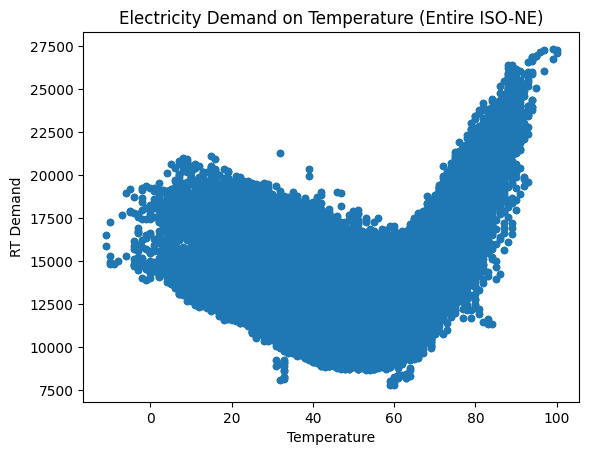

In [13]:
state_dfs[0].plot.scatter('Temperature', 'RT Demand')
plt.title('Electricity Demand on Temperature (Entire ISO-NE)')

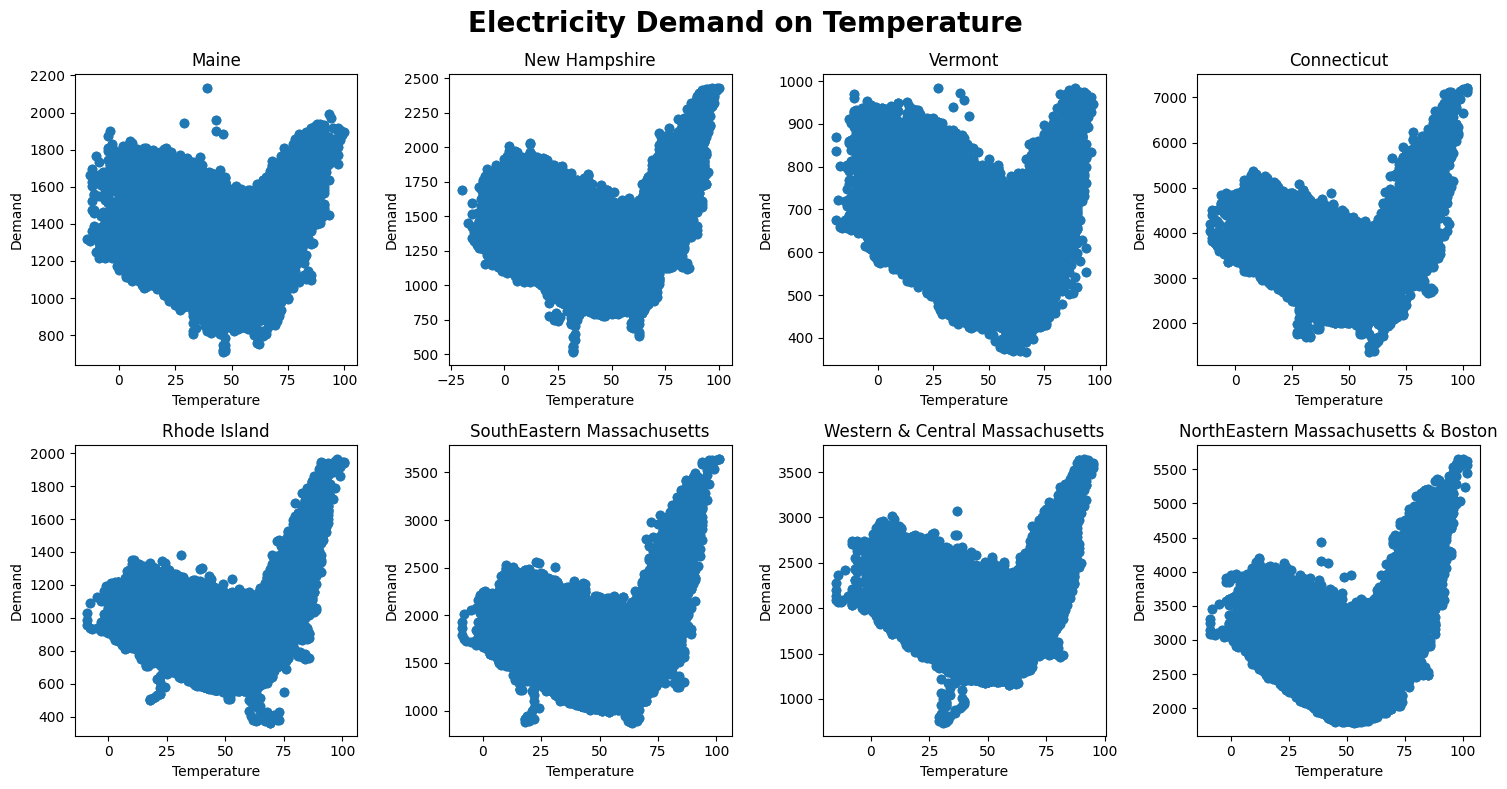

In [14]:
# Assuming `state_dfs` is a list of 8 DataFrames and `state_names` is a list of 8 titles
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # Creates a 2x4 grid of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each DataFrame and corresponding title
for i, (df, name) in enumerate(zip(state_dfs[1:], state_names_full[1:])):
    axes[i].scatter(df['Temperature'], df['RT Demand'])
    axes[i].set_title(name)
    axes[i].set_ylabel('Demand')
    axes[i].set_xlabel('Temperature')

fig.suptitle('Electricity Demand on Temperature', fontsize=20, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [19]:
for i in range(len(state_dfs)):
    state_dfs[i]['Demand Diff'] = state_dfs[i]['RT Demand'] - state_dfs[i]['DA Demand']
    state_dfs[i]['Price Diff'] = state_dfs[i]['RT Price'] - state_dfs[i]['DA Price']

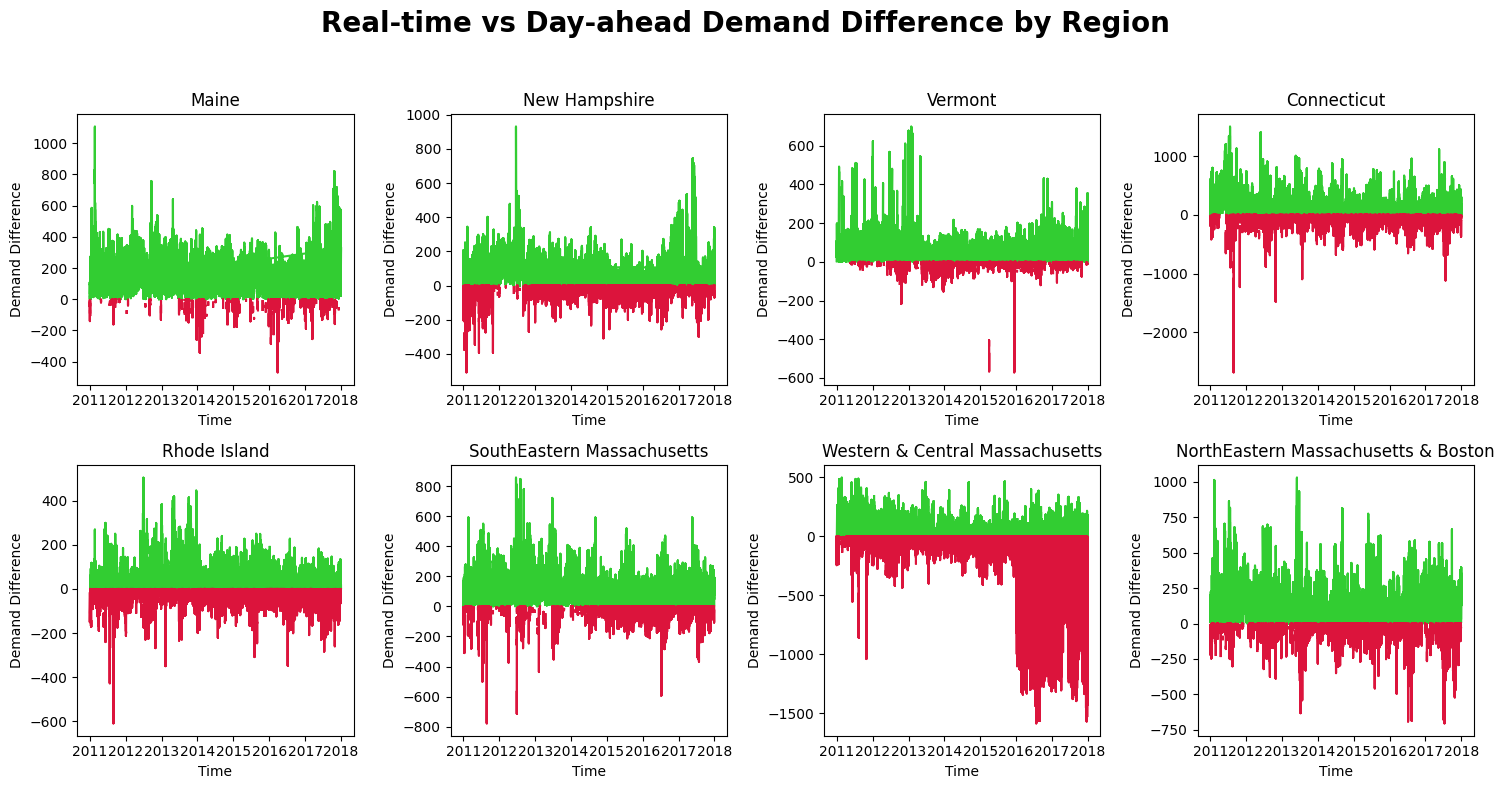

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # Creates a 2x4 grid of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each DataFrame and corresponding title
for i, (df, name) in enumerate(zip(state_dfs[1:], state_names_full[1:])):  # Assuming state_names matches state_dfs
    ax = axes[i]
    
    # Plot positive and negative values separately
    positive = df['Demand Diff'].where(df['Demand Diff'] >= 0)
    negative = df['Demand Diff'].where(df['Demand Diff'] < 0)
    
    ax.plot(df.index, positive, color='#32CD32', label='Positive')
    ax.plot(df.index, negative, color='#DC143C', label='Negative')
    
    # Add titles and labels
    ax.set_title(name)
    ax.set_ylabel('Demand Difference')
    ax.set_xlabel('Time')

fig.suptitle('Real-time vs Day-ahead Demand Difference by Region', fontsize=20, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to leave space for the suptitle

plt.show()

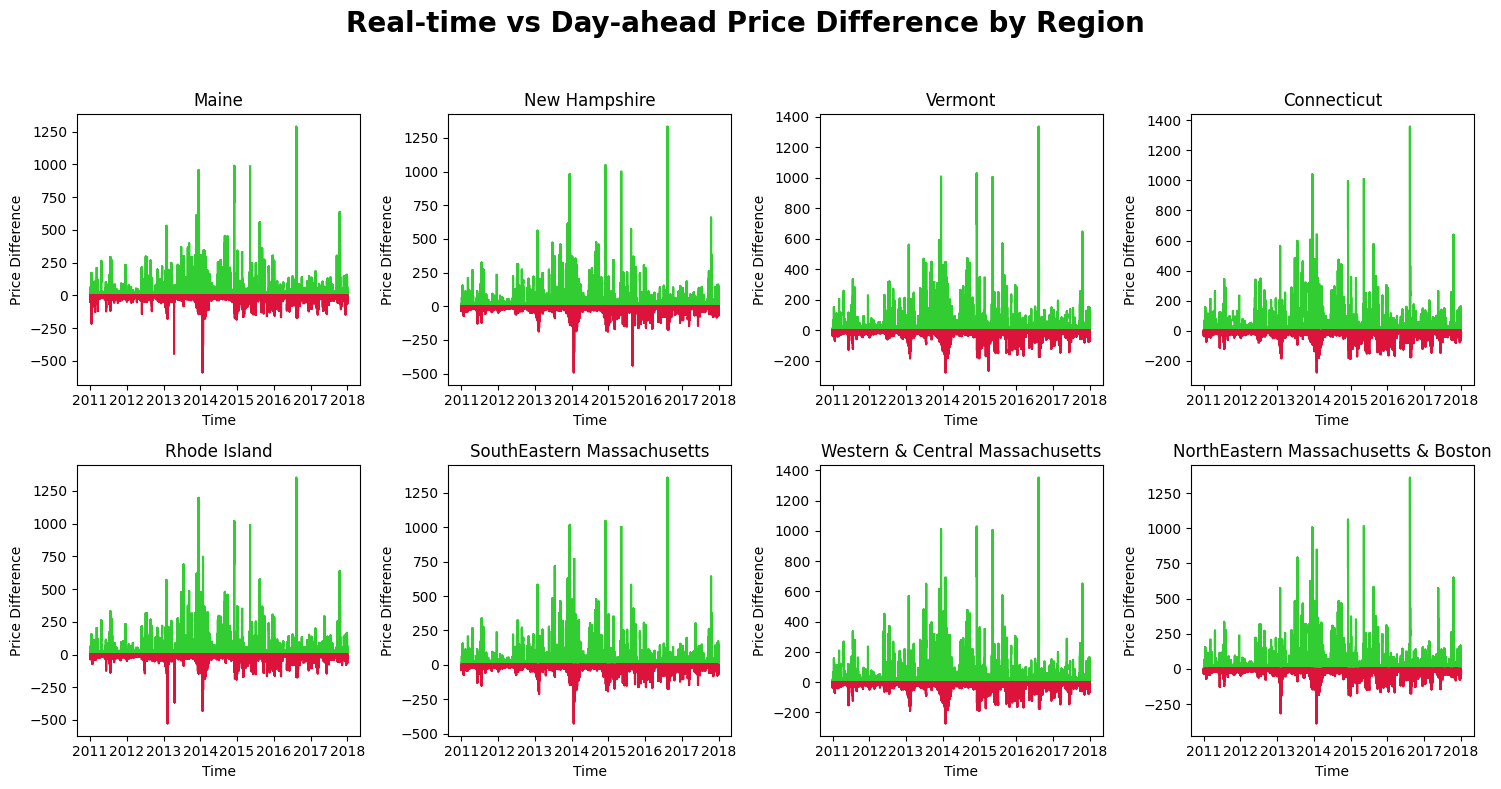

In [24]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # Creates a 2x4 grid of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each DataFrame and corresponding title
for i, (df, name) in enumerate(zip(state_dfs[1:], state_names_full[1:])):  # Assuming state_names matches state_dfs
    ax = axes[i]
    
    # Plot positive and negative values separately
    positive = df['Price Diff'].where(df['Price Diff'] >= 0)
    negative = df['Price Diff'].where(df['Price Diff'] < 0)
    
    ax.plot(df.index, positive, color='#32CD32', label='Positive')
    ax.plot(df.index, negative, color='#DC143C', label='Negative')
    
    # Add titles and labels
    ax.set_title(name)
    ax.set_ylabel('Price Difference')
    ax.set_xlabel('Time')

fig.suptitle('Real-time vs Day-ahead Price Difference by Region', fontsize=20, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to leave space for the suptitle

plt.show()

### Natural Gas Prices

https://www.eia.gov/dnav/ng/ng_pri_sum_a_EPG0_PG1_DMcf_m.htm

We control for natural gas prices because 

In [ ]:
ng = pd.read_excel('data/NG_PRI_SUM_A_EPG0_PG1_DMCF_M.xls', sheet_name = 'Data 1',
                   skiprows = 2)

ng = ng[['Date', 'Natural Gas Citygate Price in Connecticut (Dollars per Thousand Cubic Feet)', 
         'Natural Gas Citygate Price in Maine (Dollars per Thousand Cubic Feet)', 
         'Natural Gas Citygate Price in Massachusetts (Dollars per Thousand Cubic Feet)', 
         'Natural Gas Citygate Price in New Hampshire (Dollars per Thousand Cubic Feet)',
         'Natural Gas Citygate Price in Rhode Island (Dollars per Thousand Cubic Feet)',
         'Natural Gas Citygate Price in Vermont (Dollars per Thousand Cubic Feet)']]

ng.columns = ['Date', 'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']

ng = ng[(ng['Date'] >= '2011-01-01') & (ng['Date'] <= '2017-12-31')]

ng['year_month'] = ng['Date'].dt.to_period('M')

ng

,Date,Connecticut,Maine,Massachusetts,New Hampshire,Rhode Island,Vermont,year_month
456,2011-01-15,5.74,7.59,6.70,8.06,7.82,7.60,2011-01
457,2011-02-15,5.93,7.24,6.90,7.22,7.62,7.72,2011-02
458,2011-03-15,5.66,8.65,6.57,8.30,7.03,8.04,2011-03
459,2011-04-15,5.87,7.53,7.25,7.72,7.09,8.69,2011-04
460,2011-05-15,6.67,9.97,7.84,7.95,9.80,8.87,2011-05
...,...,...,...,...,...,...,...,...
535,2017-08-15,5.79,6.09,9.24,7.41,2.34,4.44,2017-08
536,2017-09-15,5.66,5.66,8.86,8.23,2.29,4.48,2017-09
537,2017-10-15,4.22,6.17,6.28,5.29,2.21,4.56,2017-10
538,2017-11-15,3.71,4.99,4.60,4.82,2.20,4.70,2017-11


In [ ]:
for i in range(len(state_dfs)):
    state_dfs[i]['year_month'] = state_dfs[i]['Date'].dt.to_period('M')
    #All New England - no NG price data
    if i == 0:
        state_dfs[i].drop(columns = ['year_month'], inplace = True)
        continue
    #Maine
    elif i == 1:
        state_dfs[i] = pd.merge(state_dfs[i], ng[['year_month', 'Maine']], on = 'year_month', how = 'left')
        state_dfs[i] = state_dfs[i].rename(columns={'Maine': 'Natural Gas Price'})
    #New Hampsphire
    elif i == 2:
        state_dfs[i] = pd.merge(state_dfs[i], ng[['year_month', 'New Hampshire']], on = 'year_month', how = 'left')
        state_dfs[i] = state_dfs[i].rename(columns={'New Hampshire': 'Natural Gas Price'})
    #Vermont
    elif i == 3:
        state_dfs[i] = pd.merge(state_dfs[i], ng[['year_month', 'Vermont']], on = 'year_month', how = 'left')
        state_dfs[i] = state_dfs[i].rename(columns={'Vermont': 'Natural Gas Price'})
    #Connecticut
    elif i == 4:
        state_dfs[i] = pd.merge(state_dfs[i], ng[['year_month', 'Connecticut']], on = 'year_month', how = 'left')
        state_dfs[i] = state_dfs[i].rename(columns={'Connecticut': 'Natural Gas Price'})
    #Rhode Island
    elif i == 5:
        state_dfs[i] = pd.merge(state_dfs[i], ng[['year_month', 'Rhode Island']], on = 'year_month', how = 'left')
        state_dfs[i] = state_dfs[i].rename(columns={'Rhode Island': 'Natural Gas Price'})
    #Massachusetts
    else:
        state_dfs[i] = pd.merge(state_dfs[i], ng[['year_month', 'Massachusetts']], on = 'year_month', how = 'left')
        state_dfs[i] = state_dfs[i].rename(columns={'Massachusetts': 'Natural Gas Price'})
    state_dfs[i].drop(columns = ['year_month'], inplace = True)

In [ ]:
state_dfs[1]

,Year,Date,Hour,Demand,Temperature,Region,Natural Gas Price
0,2011,2011-01-01,1,1048.000,31,Maine,7.59
1,2011,2011-01-01,2,1000.000,31,Maine,7.59
2,2011,2011-01-01,3,964.000,32,Maine,7.59
3,2011,2011-01-01,4,954.000,35,Maine,7.59
4,2011,2011-01-01,5,960.000,34,Maine,7.59
...,...,...,...,...,...,...,...
61358,2017,2017-12-31,20,1696.392,2,Maine,7.90
61359,2017,2017-12-31,21,1652.438,1,Maine,7.90
61360,2017,2017-12-31,22,1577.769,0,Maine,7.90
61361,2017,2017-12-31,23,1523.502,-1,Maine,7.90


### Generation Mix

https://www.iso-ne.com/isoexpress/web/reports/operations/-/tree/daily-gen-fuel-type

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

dataframes_genmix = []

for year_genmix in range(2011, 2018):
    # Define the path to your file for the current year
    data_path_genmix = f"data/gen_mix/{year_genmix}_daygenbyfuel.xlsx"
    
    sheet_name_mapping = {
        2011: "POST-EMOF Fuel Types",
        2012: "POST-EMOF Fuel Types",
        2013: "POST-EMOF Fuel Types",
        2014: "POST-EMOF Gen_w_Blending",
        2015: "POST-EMOF Gen_w_Blending",
        2016: "POST-EMOF Gen_w_Blending",
        2017: "POST-EMOF Gen_w_Blending",
        }
    
    sheet_name_genmix = sheet_name_mapping.get(year_genmix)

    # Read the data from the specific sheet for each year
    genmix_df = pd.read_excel(data_path_genmix, sheet_name=sheet_name_genmix)
    
    # Filter relevant columns
    genmix_df = genmix_df[['DATE', 'COAL', 'GAS', 'HYDRO', 'NUCLEAR', 'OIL', 
                       'LANDFILL GAS', 'METHANE', 'REFUSE', 'SOLAR', 
                       'STEAM', 'WIND', 'WOOD']]
    
    genmix_df = genmix_df.dropna(subset=['DATE'])
    genmix_df['DATE'] = pd.to_datetime(genmix_df['DATE'], format='%m/%d/%Y', errors='coerce')

    dataframes_genmix.append(genmix_df)

final_genmix_df = pd.concat(dataframes_genmix, ignore_index=True)
final_genmix_df.columns = [col.title() for col in final_genmix_df.columns]
final_genmix_df.title = "Electricity Generation by Fuel Type (2011-2017)"

print(final_genmix_df.title)
final_genmix_df




Electricity Generation by Fuel Type (2011-2017)


,Date,Coal,Gas,Hydro,Nuclear,Oil,Landfill Gas,Methane,Refuse,Solar,Steam,Wind,Wood
0,2011-01-01,20552.396,108641.394,20919.195,112147.889,-29.800,1320.874,137.195,9488.731,8.670,555.0,1122.004,7765.738
1,2011-01-02,20163.527,117377.411,25181.303,112143.165,865.881,1361.649,136.302,9711.649,6.816,554.0,1433.706,7768.051
2,2011-01-03,27166.663,160266.142,29681.796,112054.041,-55.636,1305.818,141.241,9641.529,15.152,535.0,4644.886,8129.366
3,2011-01-04,38256.357,154016.112,27829.059,112125.295,-56.624,1281.397,133.375,8517.200,7.716,589.0,3340.066,8404.685
4,2011-01-05,39574.746,155309.212,29021.944,112105.759,978.276,1230.426,136.396,8044.773,11.592,589.0,4021.743,8509.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,2017-12-27,21785.448,83816.046,25970.990,96668.337,47719.361,1301.552,134.845,9295.249,1344.148,0.0,19382.353,10121.472
2554,2017-12-28,21681.773,73238.260,23713.025,96669.403,104186.564,1282.907,128.251,8855.080,1475.247,0.0,20138.813,10222.130
2555,2017-12-29,21390.408,74888.857,24779.550,96690.388,100896.414,1327.706,140.503,8893.751,890.640,0.0,9661.927,11057.161
2556,2017-12-30,20679.519,80626.763,21410.245,96719.070,88586.984,1350.608,115.257,9300.772,358.106,0.0,9373.315,11695.493


### Elasticity

In [ ]:
pct_change_dfs = []

for i in range(len(state_dfs)):
    pct_change_df = state_dfs[i].copy()
    
    # Calculate percentage changes for Demand and Temperature
    pct_change_df['Demand_pct_change'] = pct_change_df['Demand'].pct_change()
    pct_change_df['Temperature_pct_change'] = pct_change_df['Temperature'].pct_change()

    # Calculate Elasticity
    pct_change_df['Elasticity'] = pct_change_df['Demand_pct_change'] / pct_change_df['Temperature_pct_change']

    # Remove rows with NaN or infinite Elasticity values
    pct_change_df = pct_change_df.dropna(subset=['Elasticity'])
    # pct_change_df = pct_change_df[~pct_change_df['Elasticity'].isin([np.inf, -np.inf])]

    # Append the modified DataFrame to pct_change_dfs
    pct_change_dfs.append(pct_change_df)

In [ ]:
pct_change_dfs[1]

,Year,Date,Hour,Demand,Temperature,Region,Natural Gas Price,Demand_pct_change,Temperature_pct_change,Elasticity
1,2011,2011-01-01,2,1000.000,31,Maine,7.59,-0.045802,0.000000,-inf
2,2011,2011-01-01,3,964.000,32,Maine,7.59,-0.036000,0.032258,-1.116000
3,2011,2011-01-01,4,954.000,35,Maine,7.59,-0.010373,0.093750,-0.110650
4,2011,2011-01-01,5,960.000,34,Maine,7.59,0.006289,-0.028571,-0.220126
5,2011,2011-01-01,6,983.000,33,Maine,7.59,0.023958,-0.029412,-0.814583
...,...,...,...,...,...,...,...,...,...,...
61358,2017,2017-12-31,20,1696.392,2,Maine,7.90,-0.039499,-0.333333,0.118498
61359,2017,2017-12-31,21,1652.438,1,Maine,7.90,-0.025910,-0.500000,0.051821
61360,2017,2017-12-31,22,1577.769,0,Maine,7.90,-0.045187,-1.000000,0.045187
61361,2017,2017-12-31,23,1523.502,-1,Maine,7.90,-0.034395,-inf,0.000000


Text(0.5, 1.0, 'Demand Elasticity on Temperature (New England)')

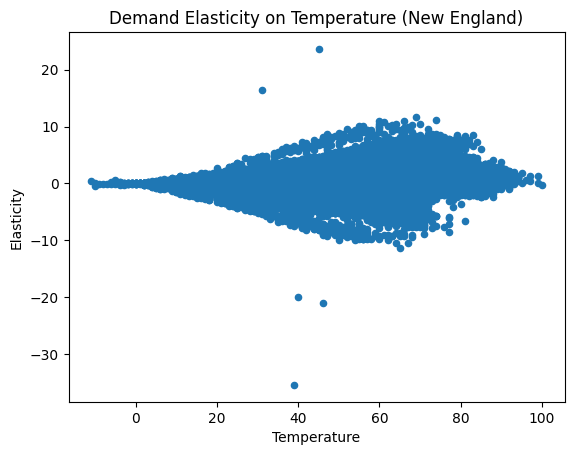

In [ ]:
pct_change_dfs[0].plot.scatter('Temperature', 'Elasticity')
plt.title('Demand Elasticity on Temperature (New England)')

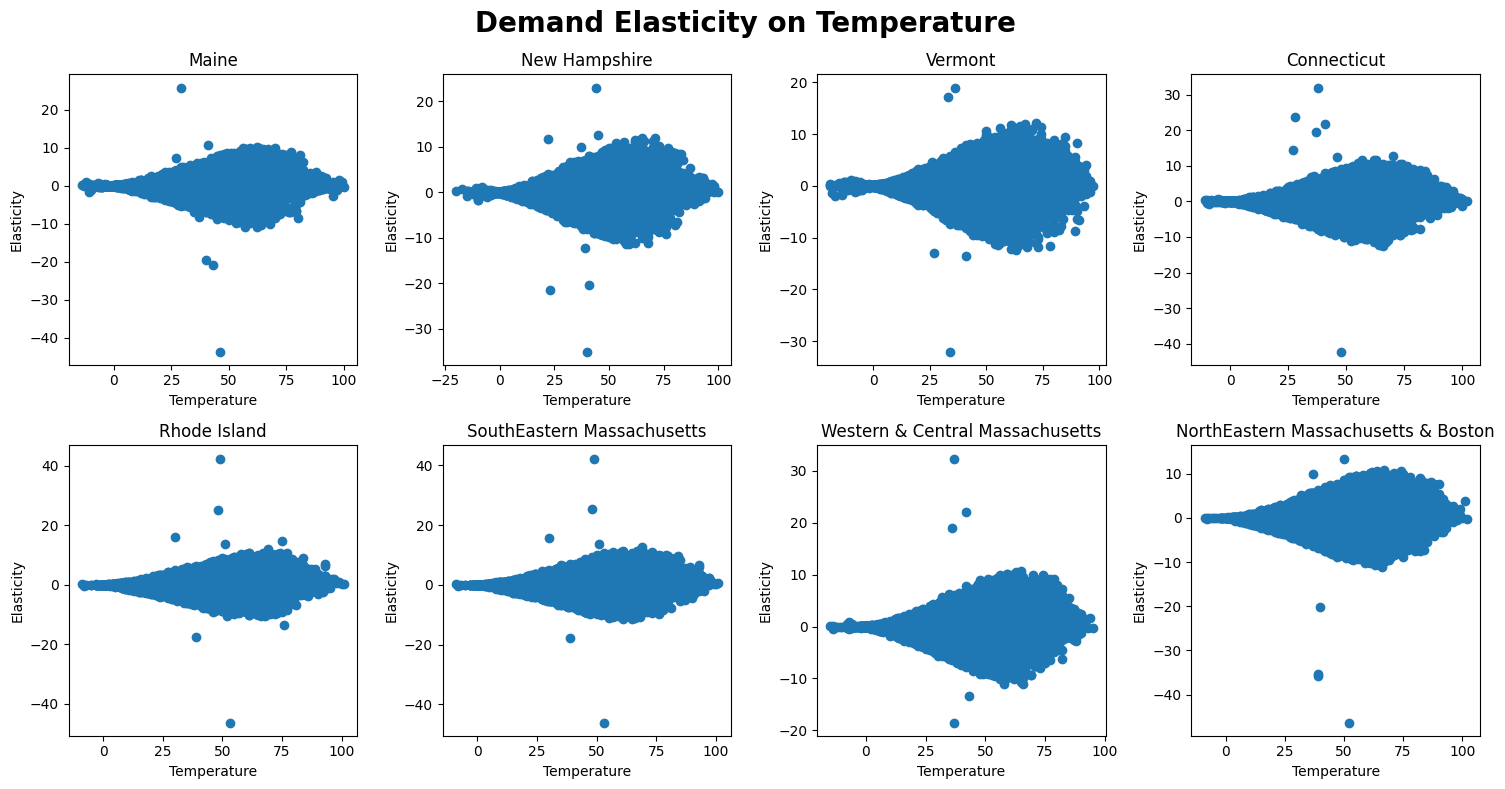

In [ ]:
# Assuming `state_dfs` is a list of 8 DataFrames and `state_names` is a list of 8 titles
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # Creates a 2x4 grid of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each DataFrame and corresponding title
for i, (df, name) in enumerate(zip(pct_change_dfs[1:], state_names_full[1:])):
    axes[i].scatter(df['Temperature'], df['Elasticity'])
    axes[i].set_title(name)
    axes[i].set_ylabel('Elasticity')
    axes[i].set_xlabel('Temperature')

fig.suptitle('Demand Elasticity on Temperature', fontsize=20, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Running Regression

In [ ]:
beta_df = pd.DataFrame(columns = state_names_full[1:], index = list(range(2011, 2018)))

beta_df 

,Maine,New Hampshire,Vermont,Connecticut,Rhode Island,SouthEastern Massachusetts,Western & Central Massachusetts,NorthEastern Massachusetts & Boston
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
